# ESCUELA POLITECNICA NACIONAL
## EMG GESTURE ANALYSIS
- Victor Hugo Vimos
- Cesar Aguayo

Realizaremos el analisis estadistico y gráfico de los gestos de la mano registrados
por un brazalete que posee 8 sensores de EMG
 
La base de datos usada corresponde a los gestos de la mano
registrados por una persona(Base de datos propia).

Se diferencias 6 categorias en la columna "activity"
- waveOut
- waveIn
- fist
- pinch
- open
- noGesture

Cada columna WMoos_F5_Ms1 ... WMoos_F5_Ms8 corresponse a la energia de ese sensor
al momento de registar un gesto

Hay 50 repeticiones por cada gesto, en total 300 repeticiones ya que hay 6 gestos

El brazalete utilizado es el siguiente mostrado en el gráfico

 ![Myo Arm Band](https://techglimpse.com/wp-content/uploads/2014/07/myo-e1406143549880.jpg)


## Importacion de librerias

In [13]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de la base de datos "DataBase200Corrected"

In [6]:
# Opcion de lectura de datos N 1
# Lectura de datos mediante el uso de una funcion propia 

#def readEmgData(path):
#    try:
#        archivo_abierto = open(path, "r")
#        lineas = archivo_abierto.readlines()
#        for linea in lineas:
#            print(linea)
#    except error:
#       print(error)
#        print(":'( Lei mal el archivo")
#path = "./DataBase200Corrected.csv"
#emgGesturesSecondMode=readEmgData(path)


# ===============================================
# Opcion de lectura de datos N 2
# Lectura de datos mediante el uso de pandas

path = "./DataBase200Corrected.csv"
emgGestures = pd.read_csv(path)
print (emgGestures)

     WMoos_F5_Ms1  WMoos_F5_Ms2  WMoos_F5_Ms3  WMoos_F5_Ms4  WMoos_F5_Ms5  \
0       15.799835     20.895050      3.482697      1.201355      0.560547   
1       17.736023     17.792938      3.647522      1.320618      1.033264   
2       20.695984     20.640320      7.135101      2.431152      1.533081   
3       16.519836     23.637054      4.135712      1.456970      0.866333   
4       21.847046     21.610321      4.969666      1.653229      1.067352   
..            ...           ...           ...           ...           ...   
295      0.200775      0.031342      0.021698      0.020416      0.015594   
296      0.223511      0.025024      0.017975      0.017944      0.014221   
297      0.229462      0.022736      0.015045      0.016541      0.017181   
298      0.564728      0.093567      0.031982      0.020660      0.014435   
299      0.187469      0.025024      0.014801      0.018768      0.012634   

     WMoos_F5_Ms6  WMoos_F5_Ms7  WMoos_F5_Ms8   activity  
0        1.18377

## Operaciones básicas de datos

#### Se realiza el analisis con 2 sensores. Sensor 1 "WMoos_F5_Ms1" y el sensor 4 "WMoos_F5_Ms4"

In [31]:
emgSensorOne  = emgGestures['WMoos_F5_Ms1']
emgSensorFour = emgGestures['WMoos_F5_Ms4']
print(type(emgSensorOne))
print(type(emgSensorFour))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Impresion de 10 datos de cada sensor

In [17]:
summary=[emgSensorOne[0:10],emgSensorFour[0:10]]
print(summary)

[0    15.799835
1    17.736023
2    20.695984
3    16.519836
4    21.847046
5    21.252960
6    25.490204
7    18.204712
8    17.536499
9    21.144531
Name: WMoos_F5_Ms1, dtype: float64, 0    1.201355
1    1.320618
2    2.431152
3    1.456970
4    1.653229
5    1.540070
6    1.845215
7    1.825897
8    2.297760
9    1.094055
Name: WMoos_F5_Ms4, dtype: float64]


### Valor medio

In [33]:

# Valor medio sensor 1 "WMoos_F5_Ms1" 

# Gesto "WAVEOUT"
Ms1_waveOut        = emgSensorOne[0:50]
Ms1_waveOut_mean   = np.mean(Ms1_waveOut)
print(Ms1_waveOut_mean)

# Gesto "WAVEIN"
Ms1_waveIn        = emgSensorOne[50:100]
Ms1_waveIn_mean   = np.mean(Ms1_waveIn)
print(Ms1_waveIn_mean)

# Gesto "FIST"
Ms1_fist        = emgSensorOne[100:150]
Ms1_fist_mean   = np.mean(Ms1_fist)
print(Ms1_fist_mean)

# Gesto "OPEN"
Ms1_open        = emgSensorOne[150:200]
Ms1_open_mean   = np.mean(Ms1_open )
print(Ms1_open_mean)

# Gesto "PINCH"
Ms1_pinch        = emgSensorOne[200:250]
Ms1_pinch_mean   = np.mean(Ms1_pinch)
print(Ms1_pinch_mean)


# Gesto "NOGESTURE"
Ms1_noGesture        = emgSensorOne[250:300]
Ms1_noGesture_mean   = np.mean(Ms1_noGesture)
print(Ms1_noGesture_mean)
print(type(Ms1_noGesture_mean))

18.832512207199997
2.5056884766199996
3.3360333252200003
11.968095092559999
5.1752136230199985
0.41298156736
<class 'float'>


In [34]:
Ms1_summary=[Ms1_waveOut_mean,Ms1_waveIn_mean,Ms1_fist_mean,Ms1_open_mean,Ms1_pinch_mean,Ms1_noGesture_mean]
print(Ms1_summary)
print(type(Ms1_summary))

[18.832512207199997, 2.5056884766199996, 3.3360333252200003, 11.968095092559999, 5.1752136230199985, 0.41298156736]
<class 'list'>


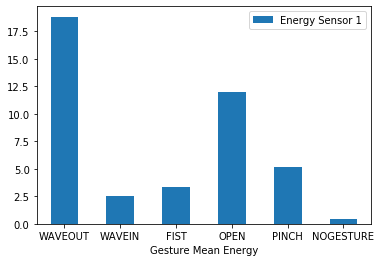

In [21]:
# Graficas comparativas del valor medio por gesto ene el sensor 1 "WMoos_F5_Ms1" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 1':Ms1_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 1', rot=0)

In [22]:
# Valor medio sensor 4 "WMoos_F5_Ms4" 

# Gesto "WAVEOUT"
Ms4_waveOut        = emgSensorFour[0:50]
Ms4_waveOut_mean   = np.mean(Ms4_waveOut)
print(Ms4_waveOut_mean)

# Gesto "WAVEIN"
Ms4_waveIn        = emgSensorFour[50:100]
Ms4_waveIn_mean   = np.mean(Ms4_waveIn)
print(Ms4_waveIn_mean)

# Gesto "FIST"
Ms4_fist        = emgSensorFour[100:150]
Ms4_fist_mean   = np.mean(Ms4_fist)
print(Ms4_fist_mean)

# Gesto "OPEN"
Ms4_open        = emgSensorFour[150:200]
Ms4_open_mean   = np.mean(Ms4_open )
print(Ms4_open_mean)

# Gesto "PINCH"
Ms4_pinch        = emgSensorFour[200:250]
Ms4_pinch_mean   = np.mean(Ms4_pinch)
print(Ms4_pinch_mean)


# Gesto "NOGESTURE"
Ms4_noGesture        = emgSensorFour[250:300]
Ms4_noGesture_mean   = np.mean(Ms4_noGesture)
print(Ms4_noGesture_mean)

1.6110205078400002
4.03719299314
0.49891662600000003
0.8442321777200003
0.4444671631200001
0.021368408199999994


In [23]:
Ms4_summary=[Ms4_waveOut_mean,Ms4_waveIn_mean,Ms4_fist_mean,Ms4_open_mean,Ms4_pinch_mean,Ms4_noGesture_mean]
print(Ms4_summary)

[1.6110205078400002, 4.03719299314, 0.49891662600000003, 0.8442321777200003, 0.4444671631200001, 0.021368408199999994]


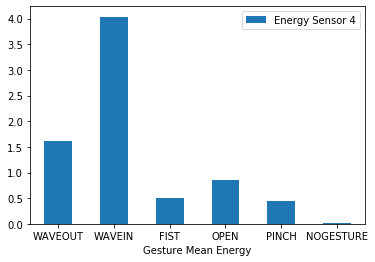

In [29]:
# Graficas comparativas del valor medio por gesto ene el sensor 4 "WMoos_F5_Ms4" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 4':Ms4_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 4', rot=0)

### Comparacion de graficas

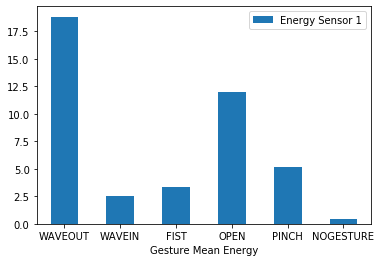

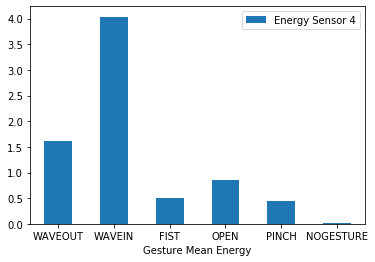

In [30]:
# Graficas comparativas del valor medio por gesto ene el sensor 1 "WMoos_F5_Ms1" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 1':Ms1_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 1', rot=0)

# Graficas comparativas del valor medio por gesto ene el sensor 4 "WMoos_F5_Ms4" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 4':Ms4_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 4', rot=0)

### Graficos de registro EMG

In [26]:
path = "./EmgGesturesRAW.csv"
emgGestures_raw = pd.read_csv(path)

In [27]:
# WAVE OUT EMG RAW GESTURE
emgGestures_raw_s1= emgGestures_raw["S1"]
emgGestures_raw_s4= emgGestures_raw["S4"]

Text(0, 0.5, 'EMG Amplitude')

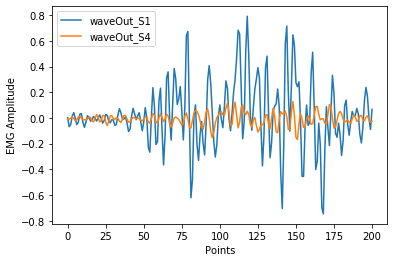

In [28]:
plt.plot(emgGestures_raw_s1)
plt.plot(emgGestures_raw_s4)
plt.legend(["waveOut_S1","waveOut_S4"])
plt.xlabel("Points")
plt.ylabel("EMG Amplitude")


In [29]:
# WAVE IN EMG RAW GESTURE
emgGestures_raw_s1= emgGestures_raw["s1"]
emgGestures_raw_s4= emgGestures_raw["s4"]

Text(0, 0.5, 'EMG Amplitude')

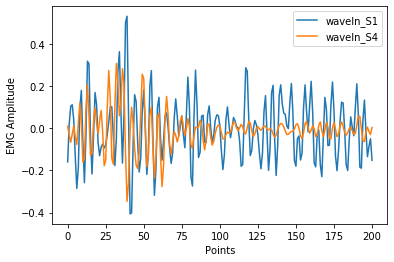

In [30]:
plt.plot(emgGestures_raw_s1)
plt.plot(emgGestures_raw_s4)
plt.legend(["waveIn_S1","waveIn_S4"])
plt.xlabel("Points")
plt.ylabel("EMG Amplitude")

In [31]:
# FIST EMG RAW GESTURE
emgGestures_raw_s1= emgGestures_raw["ss1"]
emgGestures_raw_s4= emgGestures_raw["ss4"]

Text(0, 0.5, 'EMG Amplitude')

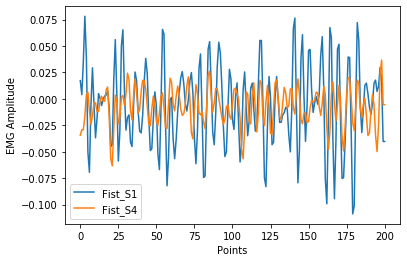

In [32]:
plt.plot(emgGestures_raw_s1)
plt.plot(emgGestures_raw_s4)
plt.legend(["Fist_S1","Fist_S4"])
plt.xlabel("Points")
plt.ylabel("EMG Amplitude")

### Las graficas representan el registro hecho por el brazalete MYO
Las conclusiones que podemos obtener de este breve analisis son:
- La señal EMG del gesto waveOut presenta mayor amplitud en el sensor 1
- La señal EMG del gesto waveIn presenta mayor amplitud en el sensor 4
- La señal EMG del gesto noGesture presenta menor amplitud en todos los sensores

Utilizando la energia calculada asi como la desviacion estandar y la media podemos dar una breve conclusión.

- Si un gesto registra mayor energia en el sensor 1 el gesto sera WAVEOUT
- Si un gesto registra mayor energia en el sensor 4 el gesto sera WAVEIN

Este simple control nos permite manejar varios dispositivo electrónicos



 
 ![Myo]( http://routenote.com/blog/wp-content/uploads/2016/01/Myo-armband.png)
 
